In [2]:

import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.shape

(887, 8)

In [5]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [7]:
df[df.duplicated()]


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


In [8]:
df.drop_duplicates(keep='first',inplace=True)


In [9]:
df.shape

(887, 8)

In [10]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [11]:
df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


# ***Data Visualization***

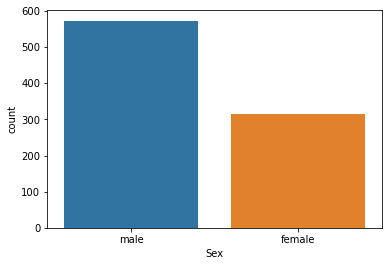

In [12]:
sns.countplot(data=df, x="Sex")
plt.show()

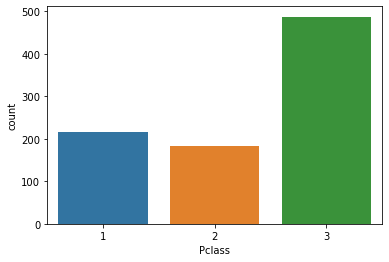

In [13]:
sns.countplot(data=df, x="Pclass")
plt.show()

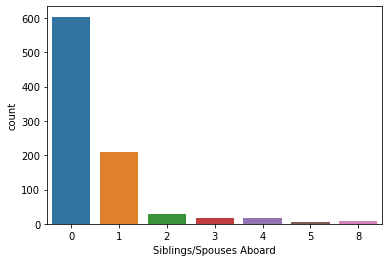

In [14]:
sns.countplot(data=df, x="Siblings/Spouses Aboard")
plt.show()



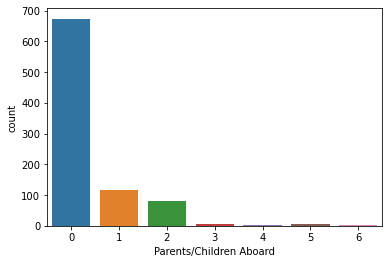

In [15]:
sns.countplot(data=df, x="Parents/Children Aboard")
plt.show()



<Figure size 720x720 with 0 Axes>

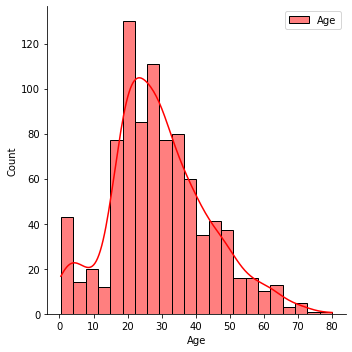

In [16]:
plt.figure(figsize=(10,10))
sns.displot(df['Age'], color="red", label="Age", kde= True)
plt.legend()

In [17]:
df['Sex'] = df['Sex'].replace(['male','female'],[0,1])

In [19]:
df = df.drop('Name',1)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


# **Data preprocessing**

In [21]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [25]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [26]:
x_train,x_test

(array([[ 0.86315976, -0.74486547,  0.03586517, -0.49076818, -0.45306201,
         -0.49314838],
        [-1.52738816,  1.34252432,  0.6114777 , -0.49076818, -0.45306201,
          0.87213561],
        [ 0.86315976,  1.34252432, -1.97877871, -0.49076818,  0.79682502,
         -0.39755953],
        ...,
        [-1.52738816, -0.74486547,  0.1797683 , -0.49076818, -0.45306201,
         -0.05196905],
        [-0.3321142 , -0.74486547, -0.10803797, -0.49076818, -0.45306201,
         -0.37455179],
        [ 0.86315976, -0.74486547, -0.75560207, -0.49076818, -0.45306201,
         -0.43772487]]),
 array([[ 0.86315976,  1.34252432, -1.11535991, -0.49076818, -0.45306201,
         -0.48168341],
        [ 0.86315976, -0.74486547, -1.76292401,  7.69639978,  2.04671204,
          0.68902247],
        [-1.52738816, -0.74486547,  1.18709024, -0.49076818, -0.45306201,
          0.12070759],
        ...,
        [ 0.86315976, -0.74486547, -1.47511774,  3.6028158 ,  2.04671204,
         -0.03512834],
  

**1. Logistic Regression**

In [27]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predicted=lr.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")



Confusion Matrix : 
 [[102  15]
 [ 21  40]]
The accuracy of Logistic Regression is :  79.7752808988764 %


**2.Gaussian Naive Bayes**

In [28]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predicted = gnb.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[95 22]
 [18 43]]
The accuracy of Gaussian Naive Bayes model is :  77.52808988764045 %


**3.Bernoulli Naive Bayes**

In [29]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
predicted = bnb.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[95 22]
 [22 39]]
The accuracy of Gaussian Naive Bayes model is :  75.28089887640449 %


**4.Support Vector Machine**

In [30]:
svc = SVC()
svc.fit(x_train, y_train)
predicted = svc.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")



Confusion Matrix : 
 [[100  17]
 [ 19  42]]
The accuracy of SVM is :  79.7752808988764 %


**5.Random Forest**

In [31]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)  
rfr.fit(x_train, y_train)  
predicted = rfr.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")


The accuracy of Random Forest is :  80.33707865168539 %


**6.K Nearest Neighbours**

In [32]:
  
knn = KNeighborsClassifier(n_neighbors = 2)  
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
  
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

  


Confusion Matrix : 
 [[108   9]
 [ 28  33]]
The accuracy of KNN is :  79.21348314606742 %


**Optimizing the KNN**

Text(0, 0.5, 'Error Rate')

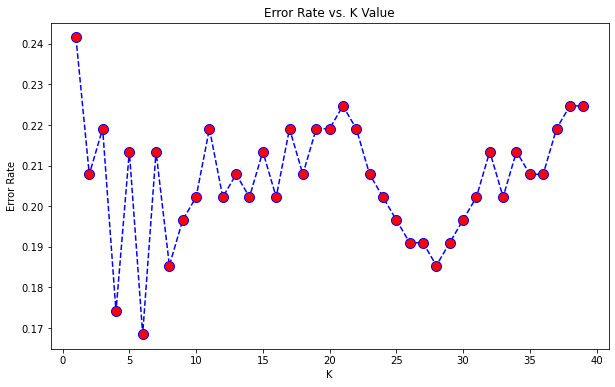

In [33]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  


plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



With k=6 as it hovers after that

In [34]:
knn = KNeighborsClassifier(n_neighbors = 6)
  
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


Confusion Matrix :
[[107  10]
 [ 20  41]]


The accuracy of KNN is :  83.14606741573034 %
